# 0. Setup

In [1]:
import nilearn
import pandas as pd
import numpy as np
import os

from nilearn import plotting
from nilearn import connectome
from nilearn import datasets
from nilearn import image


In [2]:
# Set the path to the data directory
src_dir = '../data/derivatives/fc_mvpa'

# Set the participant and session IDs
part_id = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09', 'sub-10']
ses_id = 'ses-01'

In [3]:
data_dir = []

for id in part_id:
    data_dir.append(os.path.join(src_dir, id, ses_id))  # Append to list

In [4]:
print(data_dir)

['../data/derivatives/fc_mvpa\\sub-01\\ses-01', '../data/derivatives/fc_mvpa\\sub-02\\ses-01', '../data/derivatives/fc_mvpa\\sub-03\\ses-01', '../data/derivatives/fc_mvpa\\sub-04\\ses-01', '../data/derivatives/fc_mvpa\\sub-05\\ses-01', '../data/derivatives/fc_mvpa\\sub-06\\ses-01', '../data/derivatives/fc_mvpa\\sub-07\\ses-01', '../data/derivatives/fc_mvpa\\sub-08\\ses-01', '../data/derivatives/fc_mvpa\\sub-09\\ses-01', '../data/derivatives/fc_mvpa\\sub-10\\ses-01']


In [36]:
X_total = []
target_total = []

for i in range(1,len(data_dir)): #sub 1 to 10

    fn = f'{part_id[i]}_{ses_id}_task-02a-MVPA-12sBOLD_correlation-matrix.csv'
    

    # Load feature set without index column.
    X=pd.read_csv(os.path.join(data_dir[i], fn), index_col=0)
    print(os.path.join(data_dir[i], f'{part_id[i]}_{ses_id}_task-02a-MVPA-12sBOLD.nii.gz'))

    X_total.append(X)

    
    # Load csv file with targets.
    target_set = pd.read_csv(os.path.join(data_dir[i], f'{part_id[i]}_{ses_id}_task-02a-MVPA-12sBOLD_targets.csv'))
    target_total.append(target_set['target'])


../data/derivatives/fc_mvpa\sub-02\ses-01\sub-02_ses-01_task-02a-MVPA-12sBOLD.nii.gz
../data/derivatives/fc_mvpa\sub-03\ses-01\sub-03_ses-01_task-02a-MVPA-12sBOLD.nii.gz
../data/derivatives/fc_mvpa\sub-04\ses-01\sub-04_ses-01_task-02a-MVPA-12sBOLD.nii.gz
../data/derivatives/fc_mvpa\sub-05\ses-01\sub-05_ses-01_task-02a-MVPA-12sBOLD.nii.gz
../data/derivatives/fc_mvpa\sub-06\ses-01\sub-06_ses-01_task-02a-MVPA-12sBOLD.nii.gz
../data/derivatives/fc_mvpa\sub-07\ses-01\sub-07_ses-01_task-02a-MVPA-12sBOLD.nii.gz
../data/derivatives/fc_mvpa\sub-08\ses-01\sub-08_ses-01_task-02a-MVPA-12sBOLD.nii.gz
../data/derivatives/fc_mvpa\sub-09\ses-01\sub-09_ses-01_task-02a-MVPA-12sBOLD.nii.gz
../data/derivatives/fc_mvpa\sub-10\ses-01\sub-10_ses-01_task-02a-MVPA-12sBOLD.nii.gz


In [37]:
X_total=pd.concat(X_total)

In [38]:
X_total

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,1.0,0.356525,0.355440,0.271918,0.107747,0.469292,0.125630,0.226575,0.211345,0.382210,...,-0.054264,0.091440,0.036688,0.145062,0.204651,0.111797,0.206490,0.258337,0.135348,1.0
1,1.0,0.347302,0.378047,0.308106,0.507779,0.394963,0.018519,0.452312,0.286133,0.365777,...,0.003067,0.483499,0.077197,-0.254860,-0.149818,0.023844,-0.093702,0.016776,0.014887,1.0
2,1.0,0.271502,0.480723,0.532991,0.314139,0.263561,0.151028,0.425840,0.192366,0.140046,...,0.200255,0.603313,-0.178420,0.066346,0.252929,-0.295464,-0.028532,0.064455,-0.023552,1.0
3,1.0,0.287167,0.358786,0.432129,-0.010143,0.180449,0.178885,0.428301,0.133314,0.232616,...,0.373849,0.555789,-0.293348,0.102528,0.236338,-0.289897,-0.010594,-0.071994,0.324661,1.0
4,1.0,0.475507,0.738355,0.827296,0.599735,0.659865,0.351910,0.663562,0.460257,0.358643,...,0.759377,0.869391,0.446674,0.745464,0.773653,0.529378,0.527481,0.660315,0.407441,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,0.398384,0.519039,0.171393,0.237881,0.234724,0.391118,0.484918,0.102054,0.102346,...,0.379838,0.366767,-0.022971,0.216385,0.267523,-0.128571,0.063801,0.148280,0.475625,1.0
72,1.0,0.619738,0.658710,0.591666,0.267869,0.666599,0.756025,0.673688,0.386197,0.678179,...,0.418409,0.627331,0.023029,0.621386,0.514178,0.439777,0.469907,0.517417,0.593605,1.0
73,1.0,0.396131,0.694257,0.660639,0.212614,0.352581,0.512189,0.349390,-0.281890,-0.195372,...,0.661415,0.534743,0.294292,0.525161,0.416039,-0.259563,0.304586,0.069270,0.391460,1.0
74,1.0,0.613916,0.725165,0.453658,0.278723,0.682547,0.661304,0.316044,0.007664,0.054449,...,0.676797,0.738578,-0.034625,0.486314,0.728473,0.058598,0.128654,-0.001377,0.512728,1.0


In [39]:
print(target_total)
target_total = pd.concat(target_total).values


[0      Noise_ToDiscard
1         Peacefulness
2         Peacefulness
3           Tenderness
4           Tenderness
            ...       
71       Transcendence
72    JoyfulActivation
73    JoyfulActivation
74              Wonder
75              Wonder
Name: target, Length: 76, dtype: object, 0     Noise_ToDiscard
1       Transcendence
2       Transcendence
3          Tenderness
4          Tenderness
           ...       
71       Peacefulness
72              Power
73              Power
74          Nostalgia
75          Nostalgia
Name: target, Length: 76, dtype: object, 0     Noise_ToDiscard
1              Wonder
2              Wonder
3             Tension
4             Tension
           ...       
71          Nostalgia
72              Power
73              Power
74            Sadness
75            Sadness
Name: target, Length: 76, dtype: object, 0     Noise_ToDiscard
1        Peacefulness
2        Peacefulness
3             Tension
4             Tension
           ...       
71     

In [40]:
y = list(target_total)
print(y)

# transform the target_set unique strings to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


print(y)


['Noise_ToDiscard', 'Peacefulness', 'Peacefulness', 'Tenderness', 'Tenderness', 'Transcendence', 'Transcendence', 'JoyfulActivation', 'JoyfulActivation', 'Power', 'Power', 'Nostalgia', 'Nostalgia', 'Tension', 'Tension', 'Sadness', 'Sadness', 'Wonder', 'Wonder', 'Noise_ToDiscard', 'JoyfulActivation', 'JoyfulActivation', 'Transcendence', 'Transcendence', 'Nostalgia', 'Nostalgia', 'Peacefulness', 'Peacefulness', 'Power', 'Power', 'Sadness', 'Sadness', 'Wonder', 'Wonder', 'Tension', 'Tension', 'Tenderness', 'Tenderness', 'Noise_ToDiscard', 'Transcendence', 'Transcendence', 'Sadness', 'Sadness', 'Nostalgia', 'Nostalgia', 'Wonder', 'Wonder', 'Peacefulness', 'Peacefulness', 'Tenderness', 'Tenderness', 'JoyfulActivation', 'JoyfulActivation', 'Tension', 'Tension', 'Power', 'Power', 'Noise_ToDiscard', 'Peacefulness', 'Peacefulness', 'Tenderness', 'Tenderness', 'Nostalgia', 'Nostalgia', 'Tension', 'Tension', 'Sadness', 'Sadness', 'Power', 'Power', 'Transcendence', 'Transcendence', 'JoyfulActivati

In [49]:
runs_group = np.repeat(np.arange(9), 76)
print(runs_group)
print(np.unique(runs_group))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 

# 3. Classification using scikit routines

In [50]:
from nilearn.maskers import NiftiMasker
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneGroupOut

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.pipeline import Pipeline


from nilearn.decoding import Decoder
# “background”: Use this option if your images present a clear homogeneous background.
# “whole-brain-template”: This will extract the whole-brain part of your data by resampling 
# the MNI152 brain mask for your data’s field of view.


logo = LeaveOneGroupOut()

In [55]:
X = X_total.values

In [56]:
X.shape

(684, 2304)

In [45]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average, multi_class):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average, multi_class = multi_class)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

In [57]:
selector = SelectKBest(f_classif, k=2300)
#using anova as it
svc_ovo = OneVsOneClassifier(
    Pipeline(
        [
            ("anova", selector),
            ("svc", SVC(kernel="linear")),
        ]
    )
)

### 3.1 anova test

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


accuracy = {}
lr_roc_auc_multiclass  = {}
roc_vals_mc = {}
cm = {}

f = 0

for train, test in logo.split(X, y, groups=runs_group): 
    # print("%s %s" % (train, test))
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    svc_ovo.fit(X_train, y_train)

    # predict the labels
    y_pred = svc_ovo.predict(X_test)

    #y_pred_prob = svc_ovo.predict_proba(X_test)

    # compute the accuracy
    accuracy[f] = np.mean(y_pred == y_test)

    # compute the confusion matrix
    cm[f] = confusion_matrix(y_test, y_pred)

    # compute the ROC
    roc_vals = roc_auc_score_multiclass(y_test, y_pred, average = 'micro', multi_class = 'ovo')


    lr_roc_auc_multiclass[f] = list(roc_vals.values())


    #roc_vals_mc[f] = roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='weighted')

    f += 1
    
print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {lr_roc_auc_multiclass}')

c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   0   49   98  147  196  245  294  343  392  441  490  539  588  637
  686  735  784  833  882  931  980 1029 1078 1127 1176 1225 1274 1323
 1372 1421 1470 1519 1568 1617 1666 1715 1764 1813 1862 1911 1960 2009
 2058 2107 2156 2205 2254 2303] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   0   49   98  147  196  245  294  343  392  441  490  539  588  637
  686  735  784  833  882  931  980 1029 1078 1127 1176 1225 1274 1323
 1372 1421 1470 1519 1568 1617 1666 1715 1764 1813 186

Accuracy: {0: 0.17105263157894737, 1: 0.17105263157894737, 2: 0.11842105263157894, 3: 0.09210526315789473, 4: 0.18421052631578946, 5: 0.07894736842105263, 6: 0.13157894736842105, 7: 0.17105263157894737, 8: 0.17105263157894737}
ROC AUC: {0: [0.5257352941176471, 0.8125, 0.5036764705882353, 0.5661764705882353, 0.45588235294117646, 0.5588235294117647, 0.5404411764705883, 0.6286764705882353, 0.49264705882352944, 0.45588235294117646], 1: [0.6360294117647058, 0.611111111111111, 0.4889705882352941, 0.5919117647058824, 0.6507352941176471, 0.49264705882352944, 0.45588235294117646, 0.45588235294117646, 0.5588235294117647, 0.47058823529411764], 2: [0.5882352941176471, 0.75, 0.47794117647058826, 0.47794117647058826, 0.4632352941176471, 0.45588235294117646, 0.47794117647058826, 0.4264705882352941, 0.4632352941176471, 0.6139705882352942], 3: [0.47794117647058826, 0.625, 0.5257352941176471, 0.4852941176470588, 0.5036764705882353, 0.4963235294117647, 0.5036764705882353, 0.4742647058823529, 0.4669117647

In [61]:
mean_roc_auc = np.mean(list(lr_roc_auc_multiclass.values()), axis=1)

print(f'Mean ROC AUC: {mean_roc_auc}')



# compute mean of the accuracy
mean_accuracy = (list(accuracy.values()))

print(f'Mean accuracy: {mean_accuracy}')

Mean ROC AUC: [0.55404412 0.54125817 0.51948529 0.49926471 0.56070261 0.49869281
 0.52647059 0.54129902 0.54121732]
Mean accuracy: [0.17105263157894737, 0.17105263157894737, 0.11842105263157894, 0.09210526315789473, 0.18421052631578946, 0.07894736842105263, 0.13157894736842105, 0.17105263157894737, 0.17105263157894737]


### 3.1.2 Confusion Matrix

Text(0.5, 1.0, 'sub-02_to_10')

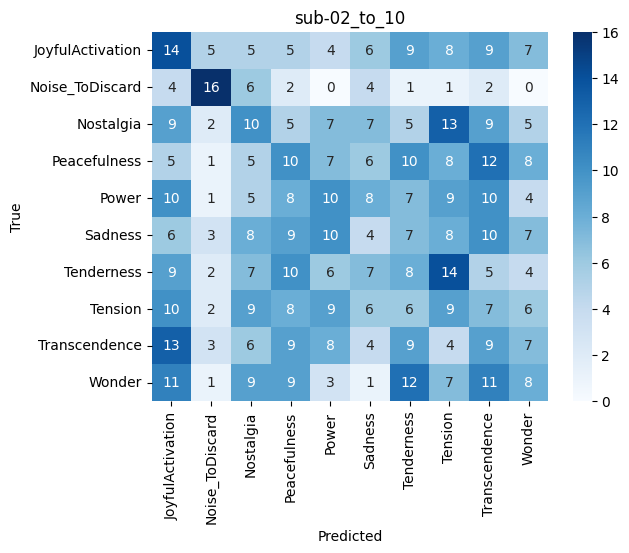

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import seaborn as sns

# plot confusion matrix totals
cm_total = np.zeros(cm[0].shape)

for i in range(len(cm)):
    cm_total += cm[i]



Confusion_matrix=sns.heatmap(cm_total, annot= True, fmt='g', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_,)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('sub-02_to_10')

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

accuracy = {}
lr_roc_auc_multiclass  = {}
roc_vals_mc = {}
cm = {}

clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

f = 0

for train, test in logo.split(X, y, groups=runs_group): 
    # print("%s %s" % (train, test))
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    clf.fit(X_train, y_train)

    # predict the labels
    y_pred = clf.predict(X_test)

    y_pred_prob = clf.predict_proba(X_test)

    # compute the accuracy
    accuracy[f] = np.mean(y_pred == y_test)

    # compute the confusion matrix
    cm[f] = confusion_matrix(y_test, y_pred)

    # compute the ROC
    roc_vals = roc_auc_score_multiclass(y_test, y_pred, average = 'micro', multi_class = 'ovo')


    lr_roc_auc_multiclass[f] = list(roc_vals.values())


    roc_vals_mc[f] = roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='weighted')

    f += 1
    
print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {lr_roc_auc_multiclass}')

Accuracy: {0: 0.09210526315789473, 1: 0.06578947368421052, 2: 0.11842105263157894, 3: 0.13157894736842105, 4: 0.13157894736842105, 5: 0.09210526315789473, 6: 0.14473684210526316, 7: 0.07894736842105263, 8: 0.11842105263157894}
ROC AUC: {0: [0.5845588235294118, 0.4930555555555556, 0.4411764705882353, 0.47794117647058826, 0.47058823529411764, 0.48161764705882354, 0.47058823529411764, 0.4375, 0.5330882352941176, 0.5404411764705883], 1: [0.5367647058823529, 0.4861111111111111, 0.5257352941176471, 0.4963235294117647, 0.4338235294117647, 0.45588235294117646, 0.4852941176470588, 0.4485294117647059, 0.4411764705882353, 0.48161764705882354], 2: [0.5477941176470589, 0.5, 0.4411764705882353, 0.5882352941176471, 0.4411764705882353, 0.5257352941176471, 0.47794117647058826, 0.5330882352941176, 0.45588235294117646, 0.5588235294117647], 3: [0.4742647058823529, 0.5, 0.4117647058823529, 0.47058823529411764, 0.5330882352941176, 0.5808823529411764, 0.5735294117647058, 0.5808823529411764, 0.426470588235294

In [67]:
mean_roc_auc = np.mean(list(lr_roc_auc_multiclass.values()), axis=1)

print(f'Mean ROC AUC: {mean_roc_auc}')



# compute mean of the accuracy
mean_accuracy = (list(accuracy.values()))

print(f'Mean accuracy: {mean_accuracy}')

Mean ROC AUC: [0.50698529 0.51397059 0.5        0.5        0.51397059 0.50698529
 0.5        0.49301471 0.52095588]
Mean accuracy: [0.11842105263157894, 0.13157894736842105, 0.10526315789473684, 0.10526315789473684, 0.13157894736842105, 0.11842105263157894, 0.10526315789473684, 0.09210526315789473, 0.14473684210526316]


Text(0.5, 1.0, 'sub-02_to_10')

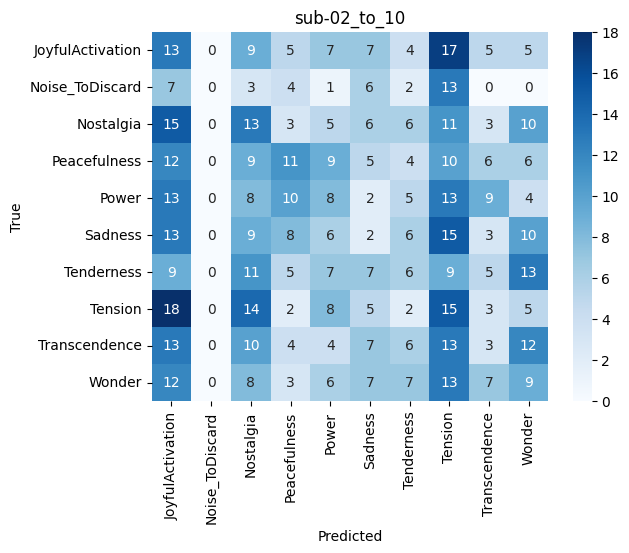

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import seaborn as sns

# plot confusion matrix totals
cm_total = np.zeros(cm[0].shape)

for i in range(len(cm)):
    cm_total += cm[i]



Confusion_matrix=sns.heatmap(cm_total, annot= True, fmt='g', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_,)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('sub-02_to_10')